In [206]:
# importing features list from user_playlist_songs.py including all the songs and its features
import import_ipynb
from user_playlist_songs import features_list

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
class create_dict(dict):
    
    def __init__(self):
        self = dict()

    def add(self, key, value):
        self[key] = value

In [209]:
songs_df = pd.DataFrame(features_list) # converting list to pandas dataframe
songs_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_pop
0,You Right,Doja Cat,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,85
1,Wild Side (feat. Cardi B),Normani,68,"[dance pop, pop, post-teen pop, r&b, urban con...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,7
2,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,87
3,Chicken Lemon Rice,Priya Ragu,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,38
4,LALA (Unlocked) (feat. Swae Lee),Alicia Keys,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,48


In [210]:
print(songs_df.shape)
songs_df.drop_duplicates(subset='track_name', inplace=True) # removing duplicate songs based on track name
print(songs_df.shape)

(2595, 17)
(2175, 17)


In [211]:
print(songs_df.isna().sum())

track_name          0
artist_name         0
artist_pop          0
artist_genres       0
album               0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
track_pop           0
dtype: int64


In [212]:
songs_df.dtypes

track_name           object
artist_name          object
artist_pop            int64
artist_genres        object
album                object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
track_pop             int64
dtype: object

In [213]:
all_unique_genres = create_dict()
for genre in songs_df["artist_genres"]:
    
    for genre_name in genre:
        # creating a bag of words for artist genres based on count of genres
        if genre_name not in all_unique_genres:
            all_unique_genres.add(genre_name,1)
        if genre_name in all_unique_genres:
            all_unique_genres[genre_name]+=1
        

print(len(all_unique_genres))

654


In [214]:
# added new column to dataframe for all the unique genres
for row in songs_df.iterrows():
    genre_score=0 # initializing genre score to 0
    for genre in row[1]["artist_genres"]: # iterating through all the genres of a song
        genre_score = genre_score+all_unique_genres[genre] # adding the score of each genre to genre score
        
    songs_df.loc[row[0], "genre_score"] = genre_score # adding the genre score to the dataframe
    # incase genre of a certain is not available in the dataframe, genre_score assigned = 0
    

In [215]:
print(len(all_unique_genres))

654


In [216]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(songs_df['artist_name'])
songs_df['artist_name'] = le_artist.transform(songs_df['artist_name']) # encoding artist name

In [217]:
# rearranging columns in dataframe
songs_df = songs_df[["track_name", "artist_name" ,"artist_pop", "artist_genres", "album", "danceability", "energy", "loudness",	"speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms" ,"time_signature", "genre_score" ,"track_pop"]]
songs_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,You Right,335,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,836.0,85
1,Wild Side (feat. Cardi B),864,68,"[dance pop, pop, post-teen pop, r&b, urban con...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,1038.0,7
2,Peaches (feat. Daniel Caesar & Giveon),619,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,584.0,87
3,Chicken Lemon Rice,939,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,3.0,38
4,LALA (Unlocked) (feat. Swae Lee),57,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,658.0,48


In [218]:
songs_df_num = songs_df.select_dtypes(include=['int64', 'float64']) # selecting numerical columns
print(type(songs_df_num))

<class 'pandas.core.frame.DataFrame'>


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

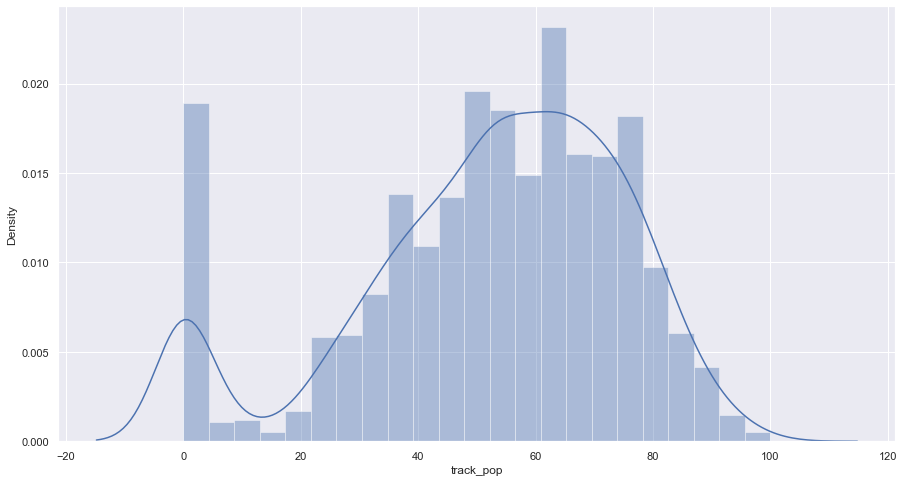

In [219]:
sns.distplot(songs_df_num['track_pop']) # plotting distribution of track popularity

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

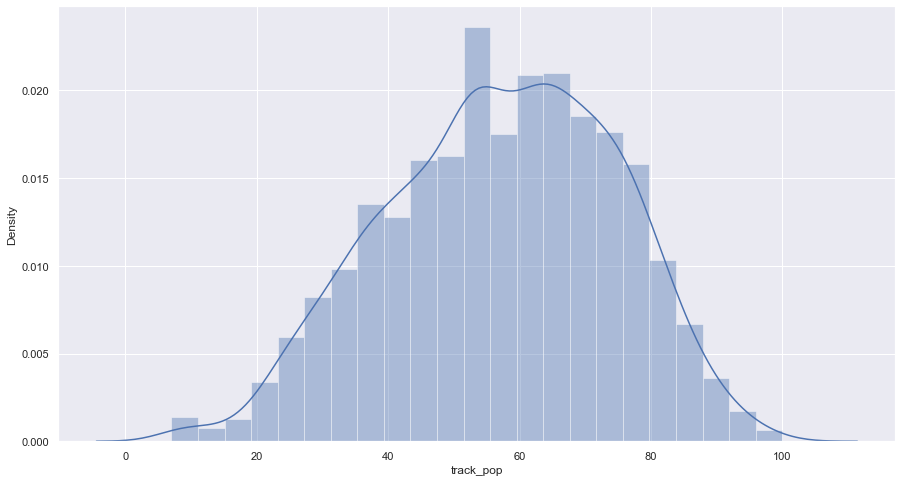

In [220]:
songs_df_num.drop(songs_df_num[songs_df_num['track_pop'] < 7].index, inplace=True) # removing songs with track popularity less than 7
sns.distplot(songs_df_num['track_pop']) # plotting distribution of track popularity

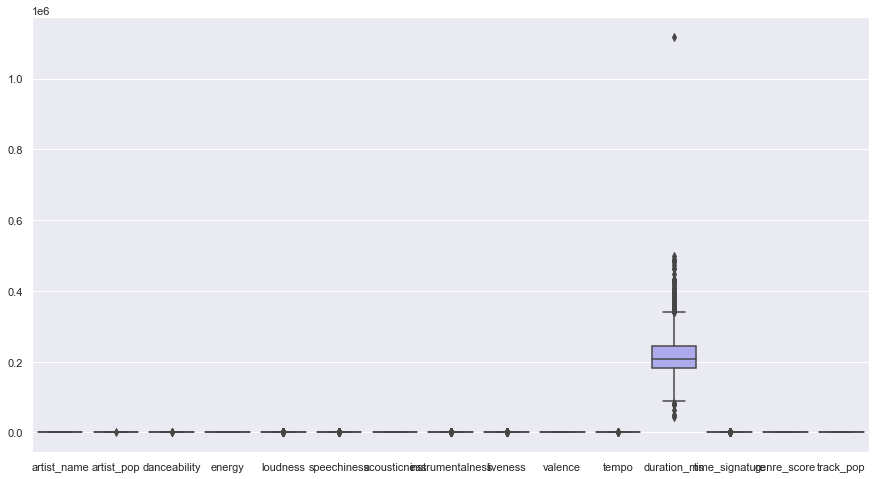

In [221]:
sns.boxplot(data=songs_df_num) # plotting boxplot of all the numerical columns before scaling (Standard)
sns.set(font_scale=.7)

In [222]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
songs_df_num_scaled = scaler.fit_transform(songs_df_num) # scaling numerical columns using min-max scaler


In [223]:
songs_df_num_scaled = pd.DataFrame(songs_df_num_scaled, columns=songs_df_num.columns) #converting numpy array to pandas dataframe
songs_df_num_scaled.head()

,artist_name,artist_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,-0.845801,1.503225,1.490127,0.128078,0.377439,-0.232691,-0.981675,-0.284547,-0.647020,-0.170613,0.380280,-0.551176,0.210416,1.294330,1.606665
1,0.521705,0.463220,0.906243,-0.068962,0.293766,1.012914,-0.954810,-0.296918,-0.496144,-0.679193,-0.274703,-0.169891,0.210416,1.863265,-2.877253
2,-0.111639,1.607225,0.488235,0.456476,0.436518,0.637145,-0.018973,-0.296918,1.948811,-0.052925,-0.970391,-0.356320,0.210416,0.584570,1.721637
3,0.715586,-0.888786,-0.580008,1.327828,0.540729,0.259984,-1.032320,2.570358,2.505889,0.913797,2.839787,-1.093643,0.210416,-1.051822,-1.095183
4,-1.564452,0.879222,0.076862,-0.139020,0.751687,1.541775,-0.752536,-0.296313,1.128668,-0.616145,0.742773,0.770288,0.210416,0.792992,-0.520322


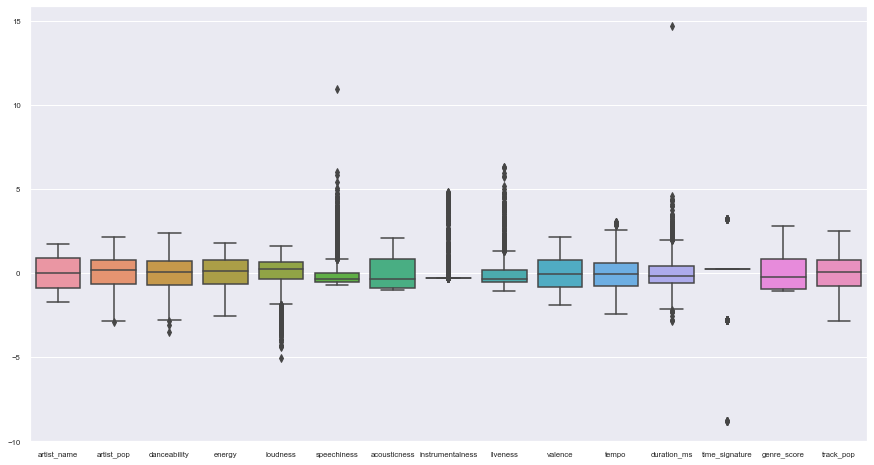

In [224]:
sns.boxplot(data=songs_df_num_scaled) # plotting boxplot of all the numerical columns after scaling (Standard)
sns.set(font_scale=.5)

In [225]:
# finding correlation between features and target variables
songs_df_corr = songs_df_num_scaled.corr()["track_pop"][:-1]
top_features = songs_df_corr[abs(songs_df_corr) > 0.1].sort_values(ascending=False)
print(top_features)

artist_pop          0.715226
genre_score         0.400278
loudness            0.219806
danceability        0.173489
energy              0.108266
instrumentalness   -0.184915
Name: track_pop, dtype: float64


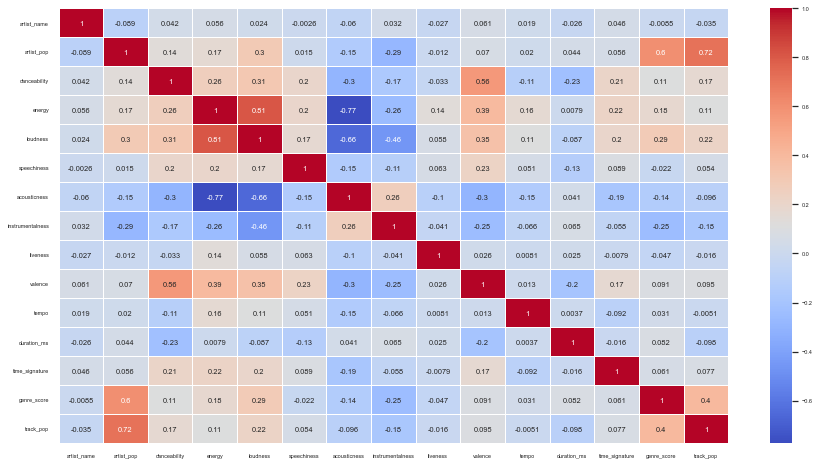

In [226]:
# creating heatmap of correlation between features and target variables
sns.heatmap(songs_df_num_scaled.corr(), annot=True, annot_kws={"size": 7.5}, cmap='coolwarm', linewidths=.5)
sns.set(rc = {'figure.figsize':(15,8)})

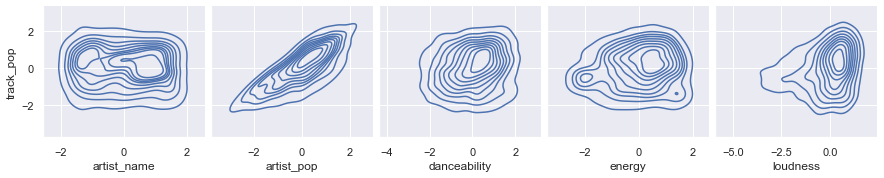

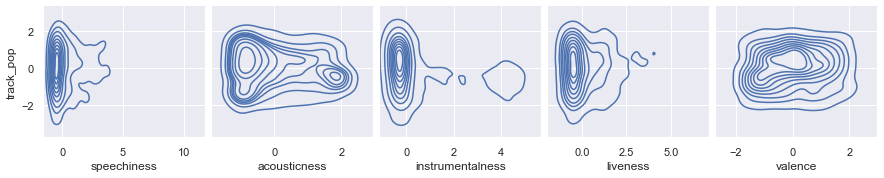

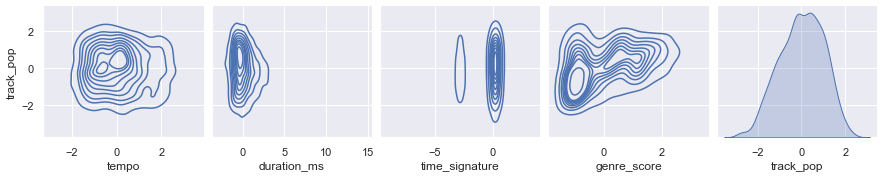

In [227]:
for i in range(0, len(songs_df_num_scaled.columns), 5):
    sns.pairplot(data=songs_df_num_scaled,
                x_vars=songs_df_num_scaled.columns[i:i+5],
                y_vars=["track_pop"],
                kind="kde"
                )


In [233]:
# creating data fram with only top features
songs_df_top_features = songs_df[["track_name", "artist_name", "danceability", "energy", "instrumentalness", "liveness", "genre_score" ,"track_pop"]]
print(songs_df_top_features.head())

                               track_name  artist_name  danceability  energy  \
0                               You Right          335         0.828   0.621   
1               Wild Side (feat. Cardi B)          864         0.740   0.576   
2  Peaches (feat. Daniel Caesar & Giveon)          619         0.677   0.696   
3                      Chicken Lemon Rice          939         0.516   0.895   
4        LALA (Unlocked) (feat. Swae Lee)           57         0.615   0.560   

   instrumentalness  liveness  genre_score  track_pop  
0          0.002330    0.0845        836.0         85  
1          0.000000    0.1040       1038.0          7  
2          0.000000    0.4200        584.0         87  
3          0.540000    0.4920          3.0         38  
4          0.000114    0.3140        658.0         48  


In [235]:
# saving dataframe to csv file
songs_csv = songs_df.to_csv('songs_df.csv', index=False)
songs_df_top_features_csv = songs_df_top_features.to_csv('songs_df_top_features.csv', index=False)

```https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?referer=&httpsredir=1&article=4962&context=sis_research```
```http://cs229.stanford.edu/proj2015/140_report.pdf```

```https://chartio.com/learn/charts/what-is-a-scatter-plot/```
<br>
```https://seaborn.pydata.org/generated/seaborn.pairplot.html```
